# Hierarchical Clustering

A hierarchical clustering approach is based on the determination of succesive clusters based on previously defined clusters. It's a technique aimed more toward grouping data into a tree cluster called dendodrams, which graphically represents the hierarchical relationship netween the undelying clusters.

## The hierarchical Clustering Algorithm

Preprocess the data by removing missing data and appliying any aditional tasks that make the data as clean as possible. This step is a more general one for most of the machine learning tasks.

1. Compute the distance matrix containing the distance between each pair of data points using a particular distance metric such as Euclidean distance, Manhattan distance, or cosine similarity. But the default distance metric is the Euclidean one.

2. Merge the two clusters that are the closest in distance.

3. Update the distance matrix with regard to the new clusters.

4. Repeat steps 1, 2 and 3 until al the clusters are merged together to create a single cluster.

In [10]:
import pandas as pd
load_data = pd.read_csv("../data/loan_data.csv")
load_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Preprocessing the data

In [12]:
# Deal with missing values
percent_missing = round(100*(load_data.isnull().sum()) / len(load_data), 2)
percent_missing

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [13]:
# Drop unwanted columns
cleaned_data = load_data.drop(['purpose', 'not.fully.paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


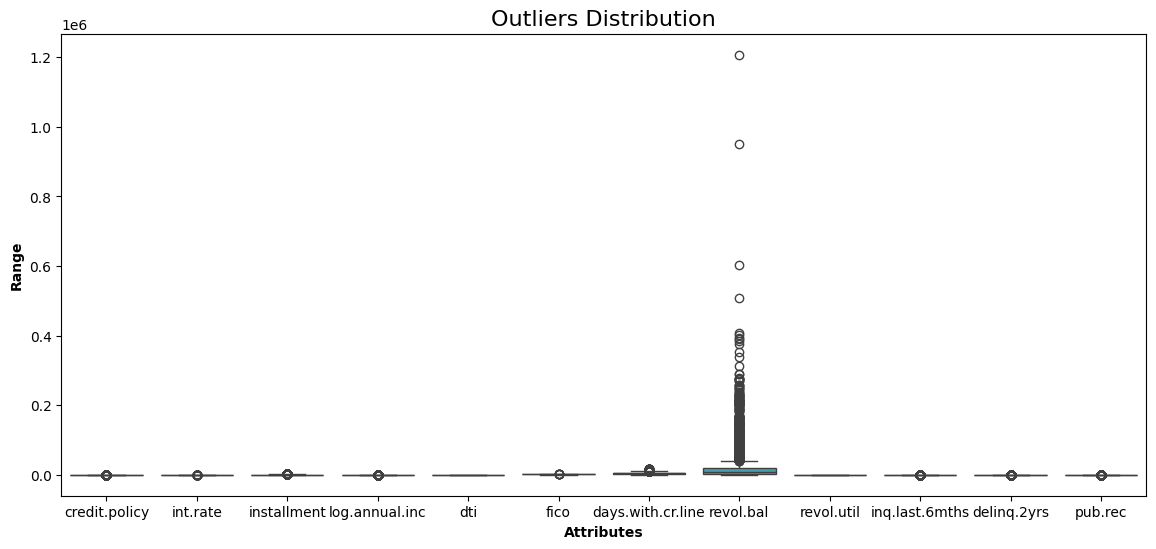

In [16]:
# Outliers analysis 
import seaborn as sns
import matplotlib.pyplot as plt
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    
show_boxplot(cleaned_data)

The boorrower's revolving balance (`revol_bal`) is the only attribute with data ponits far away from the rest. 
By using the interquartile range approach, we can remove all such points that lie outside the range defined by the quartiles `+/-1.5 * IQR`, where `IQR` is the __InterQuartile Range__.

In [17]:
def remove_outliers(data):
    
    df = data.copy()
    
    for col in list(df.columns):
    
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
    
        df = df[(df[str(col)] >= lower_bound) & 

            (df[str(col)] <= upper_bound)]
    
    return df

def remove_outliers(data):
   
    df = data.copy()
    
    for col in list(df.columns):
    
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
    
        df = df[(df[str(col)] >= lower_bound) & 

            (df[str(col)] <= upper_bound)]
    
    return df



In [18]:
without_outliers = remove_outliers(cleaned_data)

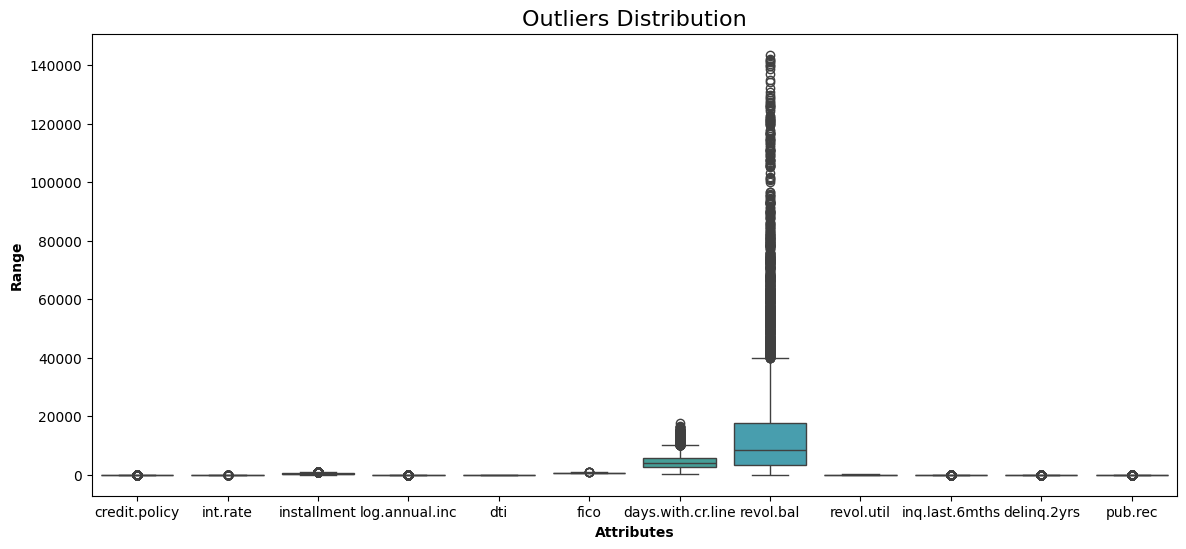

In [20]:
show_boxplot(without_outliers)

In [22]:
without_outliers.shape

(9319, 12)

### Reescale the data

In [23]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

### Applying the hierachical clustering algorithm

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

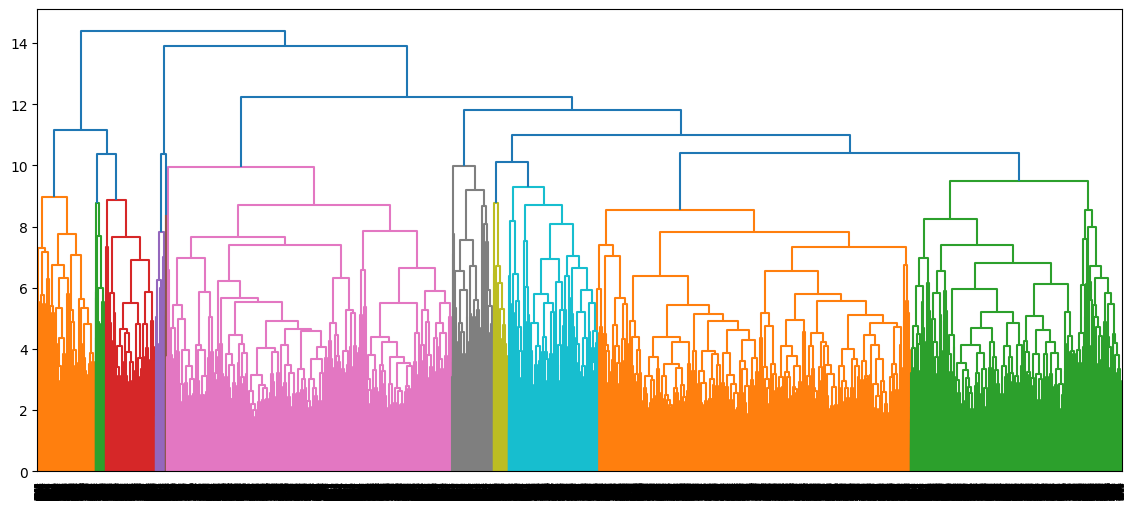

In [25]:
# Once we have computed all the three clusterings, the corresponding dendograms are show as follows
dendrogram(complete_clustering)
plt.show()

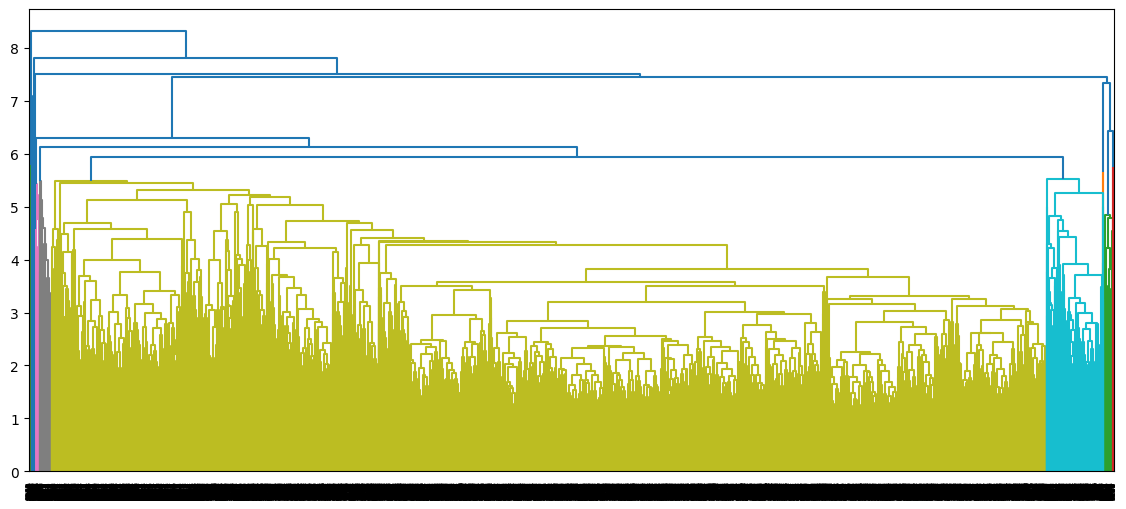

In [26]:
dendrogram(average_clustering)
plt.show()

In [32]:
average_clustering

array([[6.43400000e+03, 6.47100000e+03, 8.11239254e-04, 2.00000000e+00],
       [6.52600000e+03, 6.54300000e+03, 6.83139418e-02, 2.00000000e+00],
       [6.53300000e+03, 6.54100000e+03, 1.09824040e-01, 2.00000000e+00],
       ...,
       [1.86210000e+04, 1.86330000e+04, 7.51311028e+00, 9.27100000e+03],
       [7.73800000e+03, 1.86340000e+04, 7.81330823e+00, 9.27200000e+03],
       [1.86310000e+04, 1.86350000e+04, 8.31378246e+00, 9.31900000e+03]],
      shape=(9318, 4))

In [34]:
dendrogram(single_clustering)
plt.show()

RecursionError: maximum recursion depth exceeded